# Project
## Team: The Optimizers

### Test File

In [1]:
#import libraries
import numpy as np
import cv2

import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from time import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the test data
basepath = "./"
test_data_filename = 'X_test.npy'
test_label_filename = 't_test.npy'

#test_label_filename = None        # Use when test data labels are not available

classifier_filename = 'the_optimizers_classification_model.h5'

In [3]:
def test_model (basepath, classifier_filename, test_data_filename, test_label_filename = None):
    
    #Load the saved classifier model
    #load the model
    optimizers_classification_model = keras.models.load_model(basepath+classifier_filename)
    
    #Load the test data and labels
    X = np.load(basepath+test_data_filename).T     #test data is formatted as data_train.npy format
    #X = np.load(basepath+test_data_filename)
    if test_label_filename:
        t_test = np.load(basepath+test_label_filename)

    print('Number of Samples: ', X.shape[0])

    D=200
    img_height = 300
    img_width = 300
    
    #for testing with X_test.npy formatted as data_train.npy
    X_test = np.array([ cv2.resize(x.reshape(img_height,img_width),(D,D)).reshape(D*D) for x in X ])
    
    #X_test = X ## for testing with saved X_test.npy
    
    X_test_rgb = np.array([ cv2.cvtColor(x, cv2.COLOR_GRAY2RGB) for x in X_test])
    print(X_test_rgb.shape)
    print(X_test_rgb.shape[0])
    X_test_rs = tf.constant(X_test_rgb.reshape((X_test_rgb.shape[0],D,D, 3)), dtype=tf.float32)
    print('Rescaled Test Set Shape:', X_test_rs.shape)
    
    #Prediction on Test Data
    y_test = np.argmax(optimizers_classification_model.predict(X_test_rs),axis=1)
    print('\nPredicted Classes: \n')
    print(y_test)

    if test_label_filename:
        score = optimizers_classification_model.evaluate(X_test_rs, t_test, verbose=0)
        print('The Accuracy is: %.2f%%'%(score[1]*100))
        print('The error is: %.2f%%'%(100-score[1]*100))
        
        #classification report
        # Labels Integer Encoding

        labels_names = ['x','square root','plus sign','negative sign',
                'equal','percent','partial','product','pi','summation', 'unknown']
        print(classification_report(t_test, y_test, target_names=labels_names))
        
        #display confusion matrix
        cm = confusion_matrix(t_test, y_test, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        fig, ax = plt.subplots(figsize=(10,10))
        disp.plot(ax=ax)
        plt.show()

    

2022-12-07 22:09:17.245705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of Samples:  1000
(1000, 40000, 1, 3)
1000
Rescaled Test Set Shape: (1000, 200, 200, 3)
32/32 [==============================] - 63s 2s/step

Predicted Classes: 

[ 0  4  2  6  3  0  7  0  9  8  1  2  0  1  1  8  5  1  5  6  7  5  1  5
  1  8  1  5  7  1  5  3  4  4  4  2  6  8  5  0  9  1  8  4  5  1 10  2
  0  3  1  8  6  1  6  5  8  0  3  2  6 10  5  8  9  2  4  0  6  8  4  7
  5  1  4  4  8  1  8  3  3  8  1  9  0  7  7  8  1  1  5  0  3  9  8  9
  1  6  8  4  6  2  8  9  1  5  7  3  6  6  4  1  1  3  3  9 10  3  9  4
  7  0  3  3  3  8  3  9  0  7  3  3  0  6  7  5  7  3  7  2  1  4  9  8
  9  3  9  4  4  7  2  8  0  4  6  5  2  5  1  4  7 10  9  8  4  4  2  0
  7  2  0  9  9  9  8  9  7  1  8  9  2  3  5  8  1  0  8  7  0  7  8  2
  6  6  0  9  7  2  2  3  2  0  2  8  3  3  2  8  1  3  2  3  3  6  0  6
  9  1  7  1  5  1  2  1  8  8  2  6  6  5  0  3  2  8  8  6  4  5  9  3
  8  2  3  1  9  6  8  6  7  1  7  4  2  8  8  6  4  0  8  0  1  5  9  5
  7  3  0  1  0  5  8  5  3

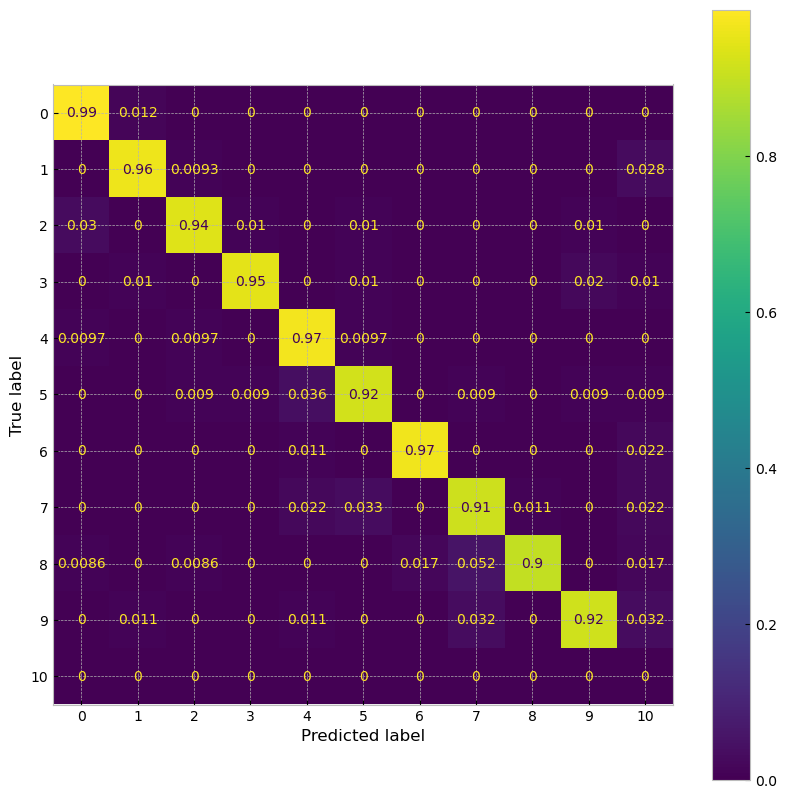

In [4]:
test_model(basepath, classifier_filename, test_data_filename, test_label_filename)

=========================================================================================================